In [2]:
%matplotlib inline

from pathlib import Path

import math
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
wine = pd.read_csv('AustralianWines.csv')

In [5]:
wine.head()

,Month,Drywhite,Fortified,Red,Rose,Sparkling,Sweetwhite
0,1980-01,1954,2585,464,112.0,1686,85
1,1980-02,2302,3368,675,118.0,1591,89
2,1980-03,3054,3210,703,129.0,2304,109
3,1980-04,2414,3111,887,99.0,1712,95
4,1980-05,2226,3756,1139,116.0,1471,91


In [6]:
wine.tail()

,Month,Drywhite,Fortified,Red,Rose,Sparkling,Sweetwhite
182,1995-03,4067,1818,2459,45.0,1897,188
183,1995-04,4022,2262,2618,52.0,1862,195
184,1995-05,3937,2612,2585,28.0,1670,189
185,1995-06,4365,2967,3310,40.0,1688,220
186,1995-07,4290,3179,3923,62.0,2031,274


In [7]:
len(wine)

187

a) For sweet wine, quadratic trend + multiplicative seasonality will be suitable.
b) For Rose wine, linear trend + multiplicative seasonality will be suitable.
c) For Sparkling wine, linear trend + multiplicative sesonality will be suitable.
d) For Red wine, linear trend + multiplicative seasonality will  be suitable.
e) For Dry white wine, linear trend + multiplicative seasonality will be suitable.
f) For Fortified wine, linear trend + multiplicative seasonality will be suitable.

In [8]:
tified = wine[['Month', 'Fortified']]

In [9]:
tified.head()

,Month,Fortified
0,1980-01,2585
1,1980-02,3368
2,1980-03,3210
3,1980-04,3111
4,1980-05,3756


In [10]:
#convert to time series
tified['Date'] = pd.to_datetime(tified.Month, format = '%Y-%m')
Sales_ts = pd.Series(tified.Fortified.values, index = tified.Date, name = 'Sales')
Sales_ts.index = pd.DatetimeIndex(Sales_ts.index, freq = Sales_ts.index.inferred_freq)

#fit a linear trend
sales_df = tsatools.add_trend(Sales_ts, trend = 'ct')
sales_df['Month'] = sales_df.index.month

C:\Users\GETHSEMAN\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
sales_df

,Sales,const,trend,Month
Date,,,,
1980-01-01,2585,1.0,1.0,1
1980-02-01,3368,1.0,2.0,2
1980-03-01,3210,1.0,3.0,3
1980-04-01,3111,1.0,4.0,4
1980-05-01,3756,1.0,5.0,5
1980-06-01,4216,1.0,6.0,6
1980-07-01,5225,1.0,7.0,7
1980-08-01,4426,1.0,8.0,8
1980-09-01,3932,1.0,9.0,9


In [12]:
sales_till_93 = sales_df[0:168]

In [13]:
sales_till_93

,Sales,const,trend,Month
Date,,,,
1980-01-01,2585,1.0,1.0,1
1980-02-01,3368,1.0,2.0,2
1980-03-01,3210,1.0,3.0,3
1980-04-01,3111,1.0,4.0,4
1980-05-01,3756,1.0,5.0,5
1980-06-01,4216,1.0,6.0,6
1980-07-01,5225,1.0,7.0,7
1980-08-01,4426,1.0,8.0,8
1980-09-01,3932,1.0,9.0,9


In [14]:
sales_from_94 = sales_df[168:188]

In [15]:
sales_from_94

,Sales,const,trend,Month
Date,,,,
1994-01-01,1154,1.0,169.0,1
1994-02-01,1568,1.0,170.0,2
1994-03-01,1965,1.0,171.0,3
1994-04-01,2659,1.0,172.0,4
1994-05-01,2354,1.0,173.0,5
1994-06-01,2592,1.0,174.0,6
1994-07-01,2714,1.0,175.0,7
1994-08-01,2294,1.0,176.0,8
1994-09-01,2416,1.0,177.0,9


In [16]:
nValid = 19
nTrain = len(Sales_ts) - nValid

#partition the data
train_df = sales_df[:nTrain]
valid_df = sales_df[nTrain:]

In [17]:
len(train_df)

168

In [18]:
train_df

,Sales,const,trend,Month
Date,,,,
1980-01-01,2585,1.0,1.0,1
1980-02-01,3368,1.0,2.0,2
1980-03-01,3210,1.0,3.0,3
1980-04-01,3111,1.0,4.0,4
1980-05-01,3756,1.0,5.0,5
1980-06-01,4216,1.0,6.0,6
1980-07-01,5225,1.0,7.0,7
1980-08-01,4426,1.0,8.0,8
1980-09-01,3932,1.0,9.0,9


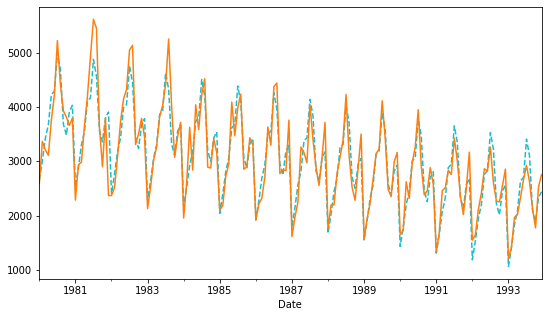

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     87.91
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           9.83e-63
Time:                        22:58:18   Log-Likelihood:                -1202.3
No. Observations:                 168   AIC:                             2431.
Df Residuals:                     155   BIC:                             2471.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2662.9429     95.482     27.

In [19]:
#fit additive seasonality to the time series

sales_lm_trendseason = sm.ols(formula = 'Sales ~ trend + C(Month)', data = train_df).fit()

#Training set vs forecast plot
plt.figure(figsize = (9, 5))
sales_lm_trendseason.predict(train_df).plot(color='C9', linestyle='dashed')
sales_till_93.Sales.plot(color='C1')


plt.show()
print(sales_lm_trendseason.summary())

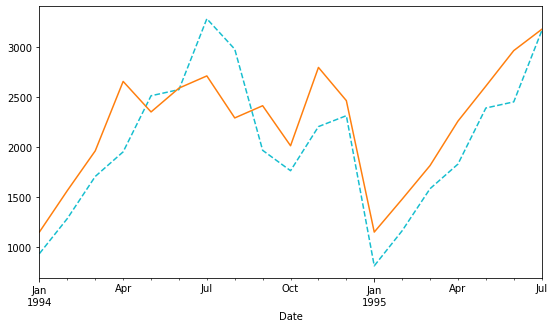

In [20]:
#Validation set vs forecast plot
plt.figure(figsize = (9, 5))

sales_lm_trendseason.predict(valid_df).plot(color='C9', linestyle='dashed')
sales_from_94.Sales.plot(color='C1')

The model fits the validation data quite well

In [33]:
test_data = pd.DataFrame({'Date': ['1994-01-01', '1994-02-01'], 'const':[1.0, 1.0], 'trend':[169, 170], 'Month':[1,2]})
test_data = test_data.set_index('Date')

In [34]:
test_data

,const,trend,Month
Date,,,
1994-01-01,1.0,169,1
1994-02-01,1.0,170,2


In [35]:
forecasts = sales_lm_trendseason.predict(test_data)
print(forecasts)

Date
1994-01-01     937.920330
1994-02-01    1288.634615
dtype: float64


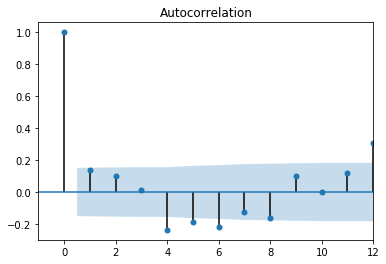

In [36]:
residual = train_df.Sales - sales_lm_trendseason.predict(train_df)
tsaplots.plot_acf(residual)
plt.xlim(-1,12)
plt.show()

Examining this plot, we can see that the model does not capture the seasonality well.